<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap11/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "Albumentation library is successfully installed!"
!pip install --no-cache-dir git+https://github.com/NVIDIA/apex > /dev/null && echo "Apex library is successfully installed!"!

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-5j3vxl5m
Albumentation library is successfully installed!
  Running command git clone -q https://github.com/NVIDIA/apex /tmp/pip-req-build-4a52tw8t
  Running command git submodule update --init --recursive -q
Apex library is successfully installed!!


In [3]:
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap11/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap11
Trial2.ipynb
Trial1.ipynb
DrawCurve.ipynb
Trail3.ipynb
Trail4.ipynb
__init__.py
transforms.py
show_images.py
model.py
lr_finder.py
gradcam.py
plot.py
evaluate.py
load_data.py
lr_range_test.py
chap11Resnet.py
train_test.py
cifar-10-python.tar.gz
test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta
readme.html


In [0]:
%matplotlib inline
import torch
from template import load_data
from template import show_images
from template import chap11Resnet
from template import train_test
from template import evaluate
from template import transforms
from template import gradcam
from template import plot
from template import lr_range_test 

In [0]:
import albumentations as A
import cv2
train_transform_list = [
                          A.PadIfNeeded(min_height=36, min_width=36, border_mode = cv2.BORDER_REFLECT, always_apply=True,p=1.0),##28 + 4 + 4 = 36
                          A.RandomCrop(height=32, width=32, always_apply=True), #RandomCrop 32, 32 (after padding of 4) 
                          A.HorizontalFlip(p = 0.7),
                          A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
                          A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=0.7) # fillvalue is 0 after normalizing as mean is 0
                       ]
test_transform_list = [A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))]
train_transform = transforms.AlbumentationTransforms(train_transform_list)
test_transform = transforms.AlbumentationTransforms(test_transform_list)

In [8]:
classes, trainloader, testloader = load_data.load(train_transform,test_transform,_batch_size=512)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


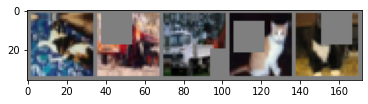

In [9]:
show_images.show_images(trainloader, classes)

In [10]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = chap11Resnet.chap11Resnet().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

epoch = 1 Lr = 0.001  Loss=1.4200586080551147 Batch_id=97 Accuracy=37.21: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]
epoch = 2 Lr = 0.0029  Loss=1.317488670349121 Batch_id=97 Accuracy=44.02: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]
epoch = 3 Lr = 0.0048  Loss=1.2204562425613403 Batch_id=97 Accuracy=42.05: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
epoch = 4 Lr = 0.006699999999999999  Loss=1.2181898355484009 Batch_id=97 Accuracy=41.12: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
epoch = 5 Lr = 0.0086  Loss=1.7674942016601562 Batch_id=97 Accuracy=22.78: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
epoch = 6 Lr = 0.0105  Loss=1.7610208988189697 Batch_id=97 Accuracy=23.23: 100%|██████████| 98/98 [00:23<00:00,  4.14it/s]
epoch = 7 Lr = 0.012400000000000001  Loss=1.77719247341156 Batch_id=97 Accuracy=21.28: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]
epoch = 8 Lr = 0.014300000000000002  Loss=1.7394593954086304 Batch_id=97 Accuracy=22.16: 100%|██████████| 98/98 [00

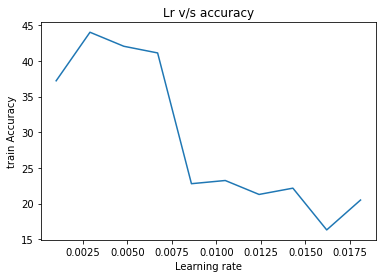

In [0]:
import torch.nn as nn
max_lr = 0.02
min_lr = 0.001
epoch = 10
criterion = nn.NLLLoss()
lr_range_test.LR_test(max_lr, min_lr,device,epoch,model,criterion,trainloader,momemtum = 0.9,weight_decay=0.05, plot= True )

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay=0.005 ) 
criterion = nn.NLLLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.0125, total_steps=None, epochs=24, steps_per_epoch=1, pct_start=0.25, anneal_strategy='linear', 
                       cycle_momentum=False, base_momentum=0.8, max_momentum=0.9, div_factor=10.0,final_div_factor =1)

In [15]:
train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,24,scheduler,best_acc = 0,path = "/content/gdrive/My Drive/school_of_ai/chap11/bestmodel.pt")

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00125


Loss=1.4083021879196167 Batch_id=97 Accuracy=38.47: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5133/10000 (51.33%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.0035000000000000005


Loss=0.9772259593009949 Batch_id=97 Accuracy=55.15: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6260/10000 (62.60%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.005750000000000001


Loss=0.9121938347816467 Batch_id=97 Accuracy=63.65: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6835/10000 (68.35%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.008


Loss=0.7331582307815552 Batch_id=97 Accuracy=68.91: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7398/10000 (73.98%)

accuracy increased, Saving model....
EPOCH: 5 LR: 0.01025


Loss=0.6962066888809204 Batch_id=97 Accuracy=72.84: 100%|██████████| 98/98 [00:23<00:00,  4.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7494/10000 (74.94%)

accuracy increased, Saving model....
EPOCH: 6 LR: 0.0125


Loss=0.740971028804779 Batch_id=97 Accuracy=75.93: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7588/10000 (75.88%)

accuracy increased, Saving model....
EPOCH: 7 LR: 0.011875


Loss=0.6273288130760193 Batch_id=97 Accuracy=78.57: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8236/10000 (82.36%)

accuracy increased, Saving model....
EPOCH: 8 LR: 0.011250000000000001


Loss=0.5034443736076355 Batch_id=97 Accuracy=81.01: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8374/10000 (83.74%)

accuracy increased, Saving model....
EPOCH: 9 LR: 0.010625


Loss=0.42016711831092834 Batch_id=97 Accuracy=83.38: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8452/10000 (84.52%)

accuracy increased, Saving model....
EPOCH: 10 LR: 0.01


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8342/10000 (83.42%)

EPOCH: 11 LR: 0.009375


Loss=0.3779027462005615 Batch_id=97 Accuracy=86.06: 100%|██████████| 98/98 [00:23<00:00,  4.13it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8476/10000 (84.76%)

accuracy increased, Saving model....
EPOCH: 12 LR: 0.00875


Loss=0.3276340961456299 Batch_id=97 Accuracy=87.54: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8604/10000 (86.04%)

accuracy increased, Saving model....
EPOCH: 13 LR: 0.008125


Loss=0.2917734682559967 Batch_id=97 Accuracy=88.56: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8506/10000 (85.06%)

EPOCH: 14 LR: 0.007500000000000001


Loss=0.3326972424983978 Batch_id=97 Accuracy=89.11: 100%|██████████| 98/98 [00:23<00:00,  4.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8796/10000 (87.96%)

accuracy increased, Saving model....
EPOCH: 15 LR: 0.006875


Loss=0.2516503632068634 Batch_id=97 Accuracy=90.25: 100%|██████████| 98/98 [00:23<00:00,  4.13it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8846/10000 (88.46%)

accuracy increased, Saving model....
EPOCH: 16 LR: 0.0062499999999999995


Loss=0.291740357875824 Batch_id=97 Accuracy=90.70: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8873/10000 (88.73%)

accuracy increased, Saving model....
EPOCH: 17 LR: 0.005624999999999999


Loss=0.3074105381965637 Batch_id=97 Accuracy=91.97: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8947/10000 (89.47%)

accuracy increased, Saving model....
EPOCH: 18 LR: 0.005


Loss=0.20001690089702606 Batch_id=97 Accuracy=92.33: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8941/10000 (89.41%)

EPOCH: 19 LR: 0.004375


Loss=0.23035699129104614 Batch_id=97 Accuracy=92.91: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9009/10000 (90.09%)

accuracy increased, Saving model....
EPOCH: 20 LR: 0.00375


Loss=0.1989401876926422 Batch_id=97 Accuracy=93.48: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8883/10000 (88.83%)

EPOCH: 21 LR: 0.0031249999999999993


Loss=0.1853518784046173 Batch_id=97 Accuracy=93.84: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8968/10000 (89.68%)

EPOCH: 22 LR: 0.0025000000000000005


Loss=0.22455832362174988 Batch_id=97 Accuracy=94.72: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9083/10000 (90.83%)

accuracy increased, Saving model....
EPOCH: 23 LR: 0.001875


Loss=0.16748255491256714 Batch_id=97 Accuracy=95.22: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9119/10000 (91.19%)

accuracy increased, Saving model....
EPOCH: 24 LR: 0.0012499999999999994


Loss=0.1570105254650116 Batch_id=97 Accuracy=95.48: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]



Test set: Average loss: 0.0005, Accuracy: 9165/10000 (91.65%)

accuracy increased, Saving model....


In [16]:
model = chap11Resnet.chap11Resnet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9 ,weight_decay = 0.0005)
checkpoint = torch.load("/content/gdrive/My Drive/school_of_ai/chap11/bestmodel.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

model.eval()
print("Loaded the best model")

Loaded the best model


In [17]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 91 %


**Evaluate the class wise accuracy**


In [18]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 87 %
Accuracy of   cat : 75 %
Accuracy of  deer : 85 %
Accuracy of   dog : 75 %
Accuracy of  frog : 83 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 88 %


**LR V/s Epochs**

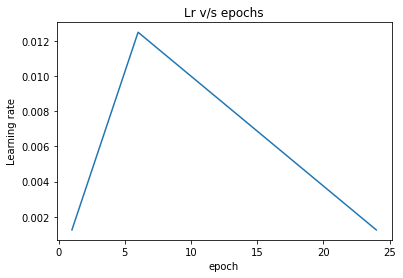

In [19]:
import matplotlib.pyplot as plt
epochs = []
for i in range(24):
  epochs.append(i+1)

plt.plot(epochs,train_test.LR)
plt.ylabel('Learning rate')
plt.xlabel("epoch")
plt.title("Lr v/s epochs")
plt.show()

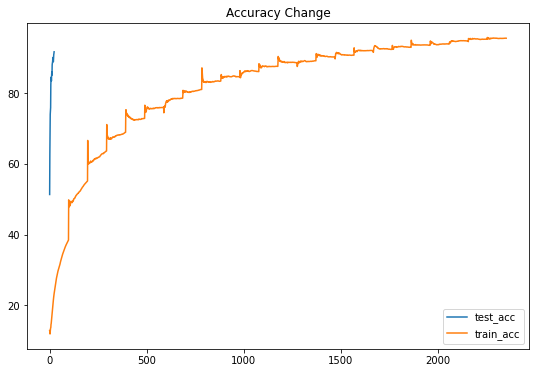

In [22]:
def plot_curve(curves,title,Figsize = (7,7)):
    fig = plt.figure(figsize=Figsize)
    ax = plt.subplot()
    for curve in curves:
        ax.plot(curve[0], label=curve[1])
        plt.title(title)
    ax.legend()
    plt.show()
curves = [(train_test.test_acc,"test_acc"),(train_test.train_acc,"train_acc")]
plot_curve(curves,"Accuracy Change",Figsize = (9,6))

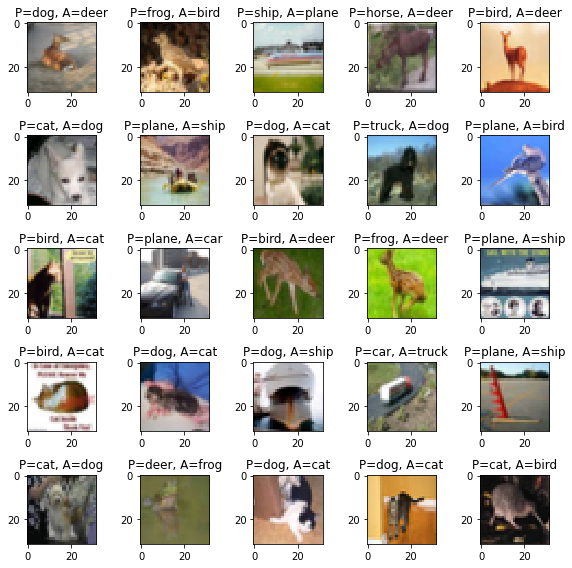

In [23]:
misclassified_images = evaluate.show_misclassified_images(model, device, testloader, classes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


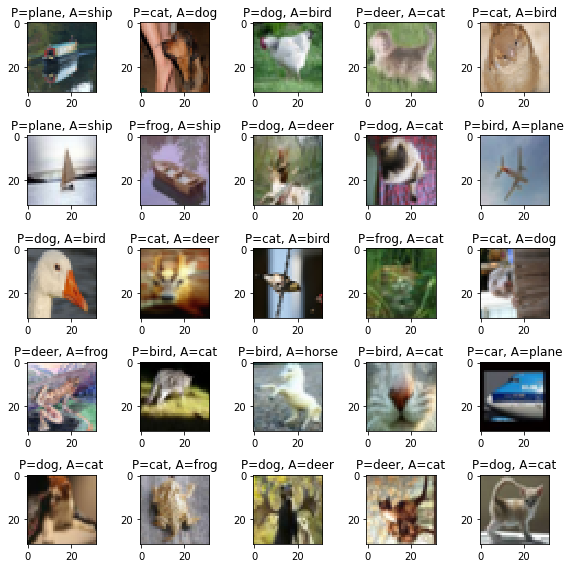

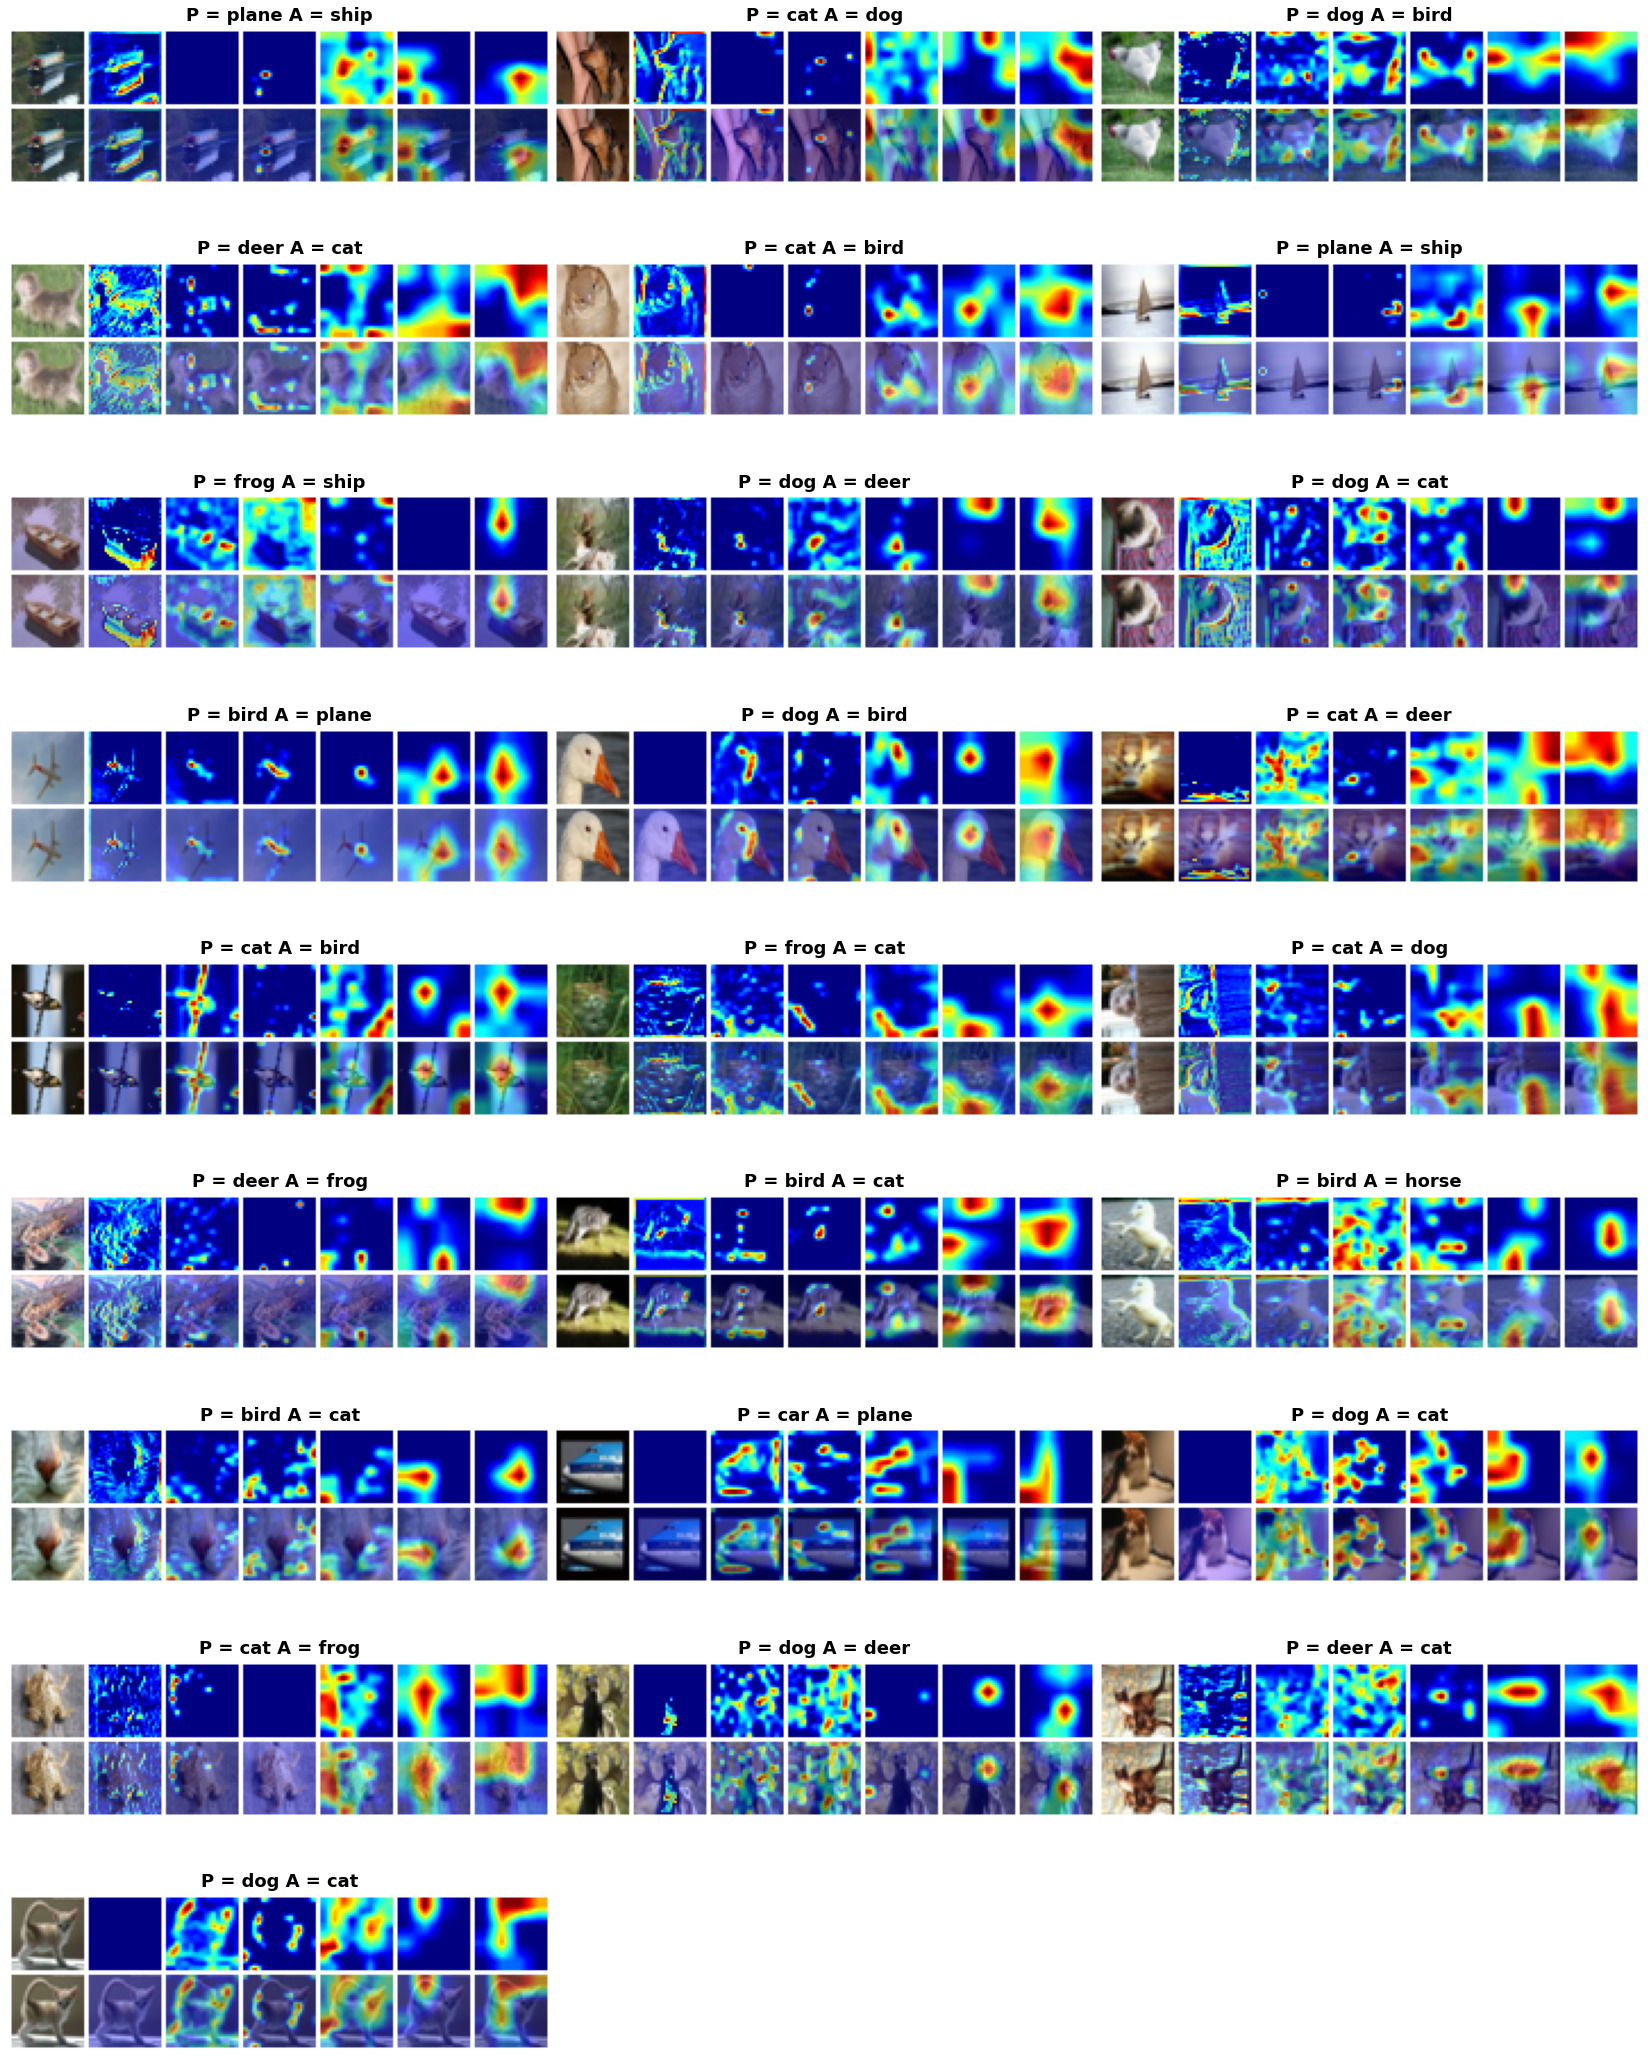

In [24]:
layers = [model.prepLayer, model.x1,model.R1,model.layer2,model.x2,model.R2]
miscalssified_images = evaluate.show_misclassified_images(model, device, testloader, classes)
gradcam.GradCamView(miscalssified_images,model,classes,layers)